In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

# sklearn packages
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report 

# plotting
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set() 

In [2]:
flu = pd.read_csv('flu_weather.csv')

In [3]:
flu.describe()

,Count,avgTmax,avgTmin,totPrecip
count,1061.000000,1061.000000,1061.000000,1061.000000
mean,398.573987,54.803761,38.346012,0.748472
std,1286.179448,11.554578,10.692107,0.533983
min,0.000000,11.571429,6.977904,0.000000
25%,0.000000,47.571429,30.955809,0.243000
50%,11.000000,55.941176,38.845330,0.600000
75%,95.000000,62.235294,45.714286,1.400000
max,11992.000000,85.000000,65.120761,1.400000


In [4]:
flu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Count      1061 non-null   float64
 1   date       1061 non-null   object 
 2   avgTmax    1061 non-null   float64
 3   avgTmin    1061 non-null   float64
 4   totPrecip  1061 non-null   float64
dtypes: float64(4), object(1)
memory usage: 41.6+ KB


array([[<AxesSubplot:title={'center':'Count'}>]], dtype=object)

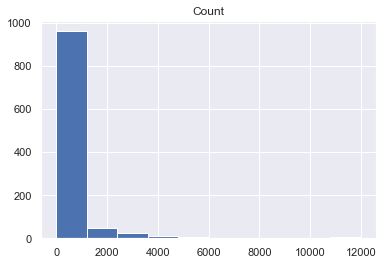

In [5]:
flu.hist(column='Count', bins=10)

In [6]:
# to address the bias in the data we will categorize it
flu.loc[flu['Count'] == 0, 'Count'] = 0
flu.loc[(flu['Count'] >0) & (flu['Count'] < 100), 'Count'] = 1
flu.loc[flu['Count'] >=100, 'Count'] = 2


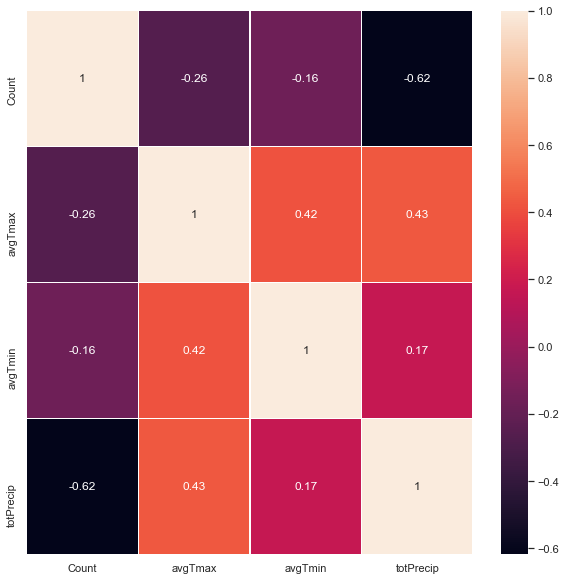

In [7]:
f, ax = plt.subplots(figsize=(10, 10))
_ = sns.heatmap(flu.corr(), annot=True, linewidths=.5, ax=ax)

In [8]:
flu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Count      1061 non-null   float64
 1   date       1061 non-null   object 
 2   avgTmax    1061 non-null   float64
 3   avgTmin    1061 non-null   float64
 4   totPrecip  1061 non-null   float64
dtypes: float64(4), object(1)
memory usage: 41.6+ KB


array([[<AxesSubplot:title={'center':'Count'}>]], dtype=object)

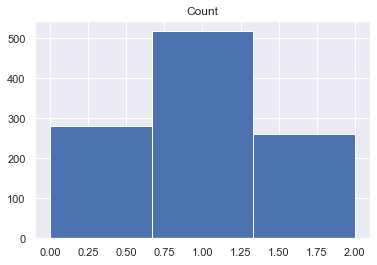

In [9]:
flu.hist('Count', bins=3)

In [10]:
flu['Count'] = flu['Count'].astype('category')

## Prep the data for analysis 

In [11]:
# drop the date column for our analysis
flu.drop(['date'], axis=1, inplace=True)

# randomize the data to prevent the potential for skew 
from sklearn.utils import shuffle

flu = shuffle(flu)

In [12]:
#gather up names of all the columns
cols = flu.columns

#set the prediction column and the feature columns for KNN
prediction_col = 'Count'
feature_cols = [c for c in cols if c != prediction_col]

x = flu[feature_cols].values
y = flu[prediction_col].values

#split the dataset into the train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=25)

In [13]:
# Scale the data to be between -1 and 1
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

## Decision Tree to help identify our importance features.

In [14]:
# establish and fit the model using DecisonTree()
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(x_train, y_train)

#gathering the predictions
predictions = tree_model.predict(x_test)

In [15]:
# display the importance features

importance_list = list(zip(feature_cols,tree_model.feature_importances_))
sorted_import_feature = sorted(importance_list, key = lambda x: x[1],reverse=True)
max_feature_len = len(max(feature_cols, key=len))

for feature, rank in sorted_import_feature:
    dots = max_feature_len - len(feature)
    print(f'{feature}: {"."*dots} {rank:.2f}')

totPrecip:  0.44
avgTmin: .. 0.31
avgTmax: .. 0.25


In [16]:
# establish and fit the model using DecisonTree()
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(x_train, y_train)

#gathering the predictions
predictions = tree_model.predict(x_test)

0.0     93
1.0    156
2.0     70
dtype: int64


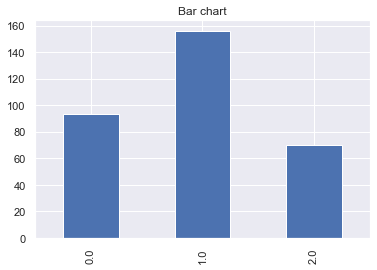

In [17]:
test_by_count=pd.value_counts(y_test, sort= False)
test_by_count.plot(kind= 'bar')
plt.title('Bar chart')

print(test_by_count)

2.0    100
0.0     93
1.0    126
dtype: int64


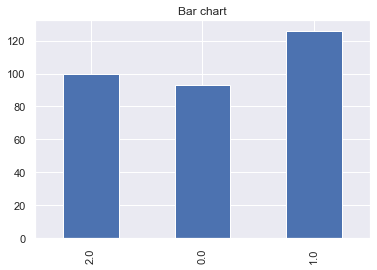

In [20]:
preds_by_count=pd.value_counts(predictions, sort= False)
preds_by_count.plot(kind= 'bar')
plt.title('Bar chart')

print(preds_by_count)

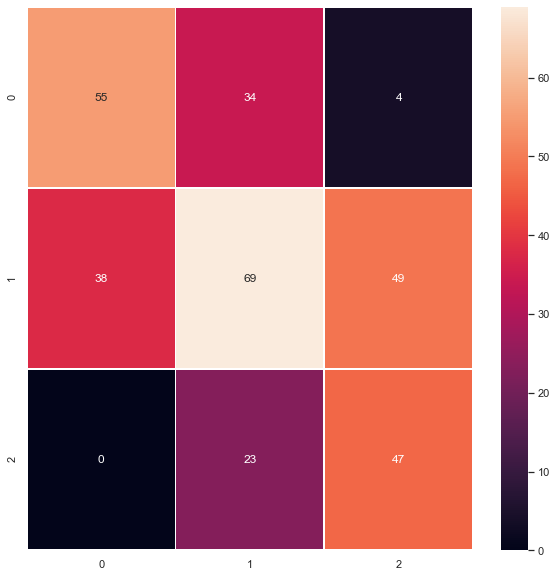

In [21]:
con_mat = confusion_matrix(y_test, predictions)

f, ax = plt.subplots(figsize=(10, 10))
_ = sns.heatmap(con_mat, annot=True, linewidths=1, ax=ax)

In [22]:
print(accuracy_score(y_test,predictions))

0.5360501567398119


In [23]:
#testing for overfitting by measuring against the test data
predictions = tree_model.predict(x_train)

print(accuracy_score(y_train,predictions))

0.9110512129380054


In [24]:
# Visualize data 

import pydotplus
#from sklearn import tree (already imported)
import collections

dot_data = tree.export_graphviz(tree_model,
                                feature_names=feature_cols,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree_unpruned.png')

True

In [25]:
#display the png here
from IPython.display import Image

Image(filename='tree_unpruned.png') 

## Decision Tree with pruning

Definitely over-fitting the data, so on to pruning.

   max_depth   accuracy
0        2.0  55.172414
1        3.0  54.858934
2        4.0  57.680251
3        5.0  61.755486
4        6.0  60.188088
5        7.0  56.426332
6        8.0  55.172414
7        9.0  53.918495
8       10.0  54.231975



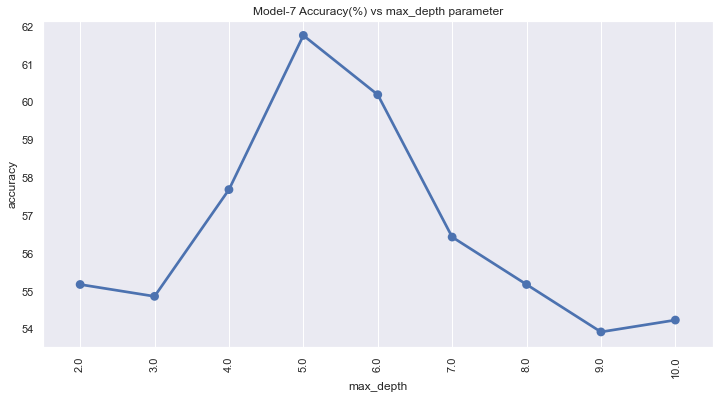

In [49]:
c_parameter_name = 'max_depth'
c_parameter_values = [2,3,4,5,6,7,8,9,10]
c_best_parameter = 0
c_best_accuracy = 0
c_worst_parameter = 0
c_worst_accuracy = 100
df = pd.DataFrame(columns=[c_parameter_name, 'accuracy'])
for input_parameter in c_parameter_values:
    model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=input_parameter, random_state=35)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
        
    acc_score = accuracy_score(y_test,y_pred)*100
    
    df = df.append({c_parameter_name : input_parameter , 'accuracy' : acc_score}, ignore_index=True)
    
    if acc_score > c_best_accuracy:
        c_best_accuracy = acc_score
        c_best_parameter = input_parameter
        c_best_model = model
        
    if acc_score < c_worst_accuracy:
        c_worst_accuracy = acc_score
        c_worst_parameter = input_parameter
        c_worst_model = model
    
print(df)
print("")
plt.figure(figsize=(12,6))
sns.pointplot(x=c_parameter_name, y="accuracy", data=df)
title = 'Model-7 Accuracy(%) vs ' + c_parameter_name + ' parameter'
plt.title(title)
plt.xticks(rotation= 90)
plt.grid()

    min_samples_split   accuracy
0                 5.0  56.426332
1                10.0  55.799373
2                15.0  56.112853
3                20.0  57.366771
4                25.0  56.112853
5                30.0  55.799373
6                35.0  56.112853
7                40.0  56.739812
8                50.0  57.993730
9                60.0  57.053292
10               70.0  57.680251
11               80.0  59.561129
12               90.0  59.561129



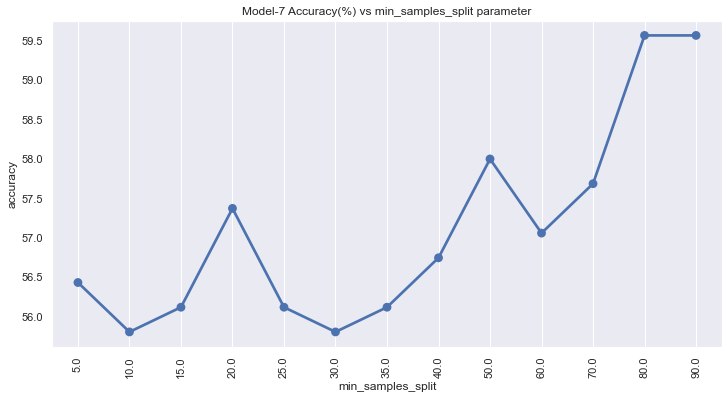

In [50]:
c_parameter_name = 'min_samples_split'
c_parameter_values = [5,10,15,20,25,30,35,40,50,60,70,80,90]
c_best_parameter = 0
c_best_accuracy = 0
c_worst_parameter = 0
c_worst_accuracy = 100
df = pd.DataFrame(columns=[c_parameter_name, 'accuracy'])
for input_parameter in c_parameter_values:
    model = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=input_parameter, random_state=35)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
        
    acc_score = accuracy_score(y_test,y_pred)*100
    
    df = df.append({c_parameter_name : input_parameter , 'accuracy' : acc_score}, ignore_index=True)
    
    if acc_score > c_best_accuracy:
        c_best_accuracy = acc_score
        c_best_parameter = input_parameter
        c_best_model = model
        
    if acc_score < c_worst_accuracy:
        c_worst_accuracy = acc_score
        c_worst_parameter = input_parameter
        c_worst_model = model
    
print(df)
print("")
plt.figure(figsize=(12,6))
sns.pointplot(x=c_parameter_name, y="accuracy", data=df)
title = 'Model-7 Accuracy(%) vs ' + c_parameter_name + ' parameter'
plt.title(title)
plt.xticks(rotation= 90)
plt.grid()

   min_samples_leaf   accuracy
0               5.0  55.485893
1              10.0  57.053292
2              15.0  57.053292
3              20.0  58.307210
4              25.0  54.545455
5              30.0  54.231975
6              35.0  57.993730
7              40.0  59.561129
8              50.0  65.203762
9              60.0  62.695925



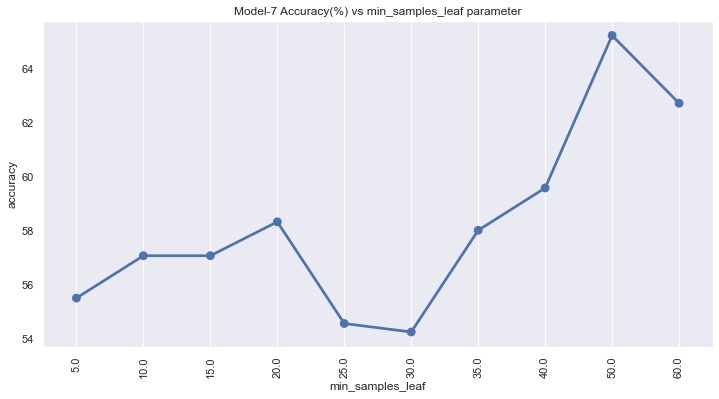

In [51]:
c_parameter_name = 'min_samples_leaf'
c_parameter_values = [5,10,15,20,25,30,35,40,50,60]
c_best_parameter = 0
c_best_accuracy = 0
c_worst_parameter = 0
c_worst_accuracy = 100
df = pd.DataFrame(columns=[c_parameter_name, 'accuracy'])
for input_parameter in c_parameter_values:
    model = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=input_parameter, random_state=35)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
        
    acc_score = accuracy_score(y_test,y_pred)*100
    
    df = df.append({c_parameter_name : input_parameter , 'accuracy' : acc_score}, ignore_index=True)
    
    if acc_score > c_best_accuracy:
        c_best_accuracy = acc_score
        c_best_parameter = input_parameter
        c_best_model = model
        
    if acc_score < c_worst_accuracy:
        c_worst_accuracy = acc_score
        c_worst_parameter = input_parameter
        c_worst_model = model
    
print(df)
print("")
plt.figure(figsize=(12,6))
sns.pointplot(x=c_parameter_name, y="accuracy", data=df)
title = 'Model-7 Accuracy(%) vs ' + c_parameter_name + ' parameter'
plt.title(title)
plt.xticks(rotation= 90)
plt.grid()

   max_leaf_nodes   accuracy
0             2.0  49.529781
1             3.0  49.216301
2             4.0  49.216301
3             5.0  49.529781
4             6.0  55.485893
5             7.0  59.874608
6             8.0  59.874608
7             9.0  59.561129
8            10.0  59.561129



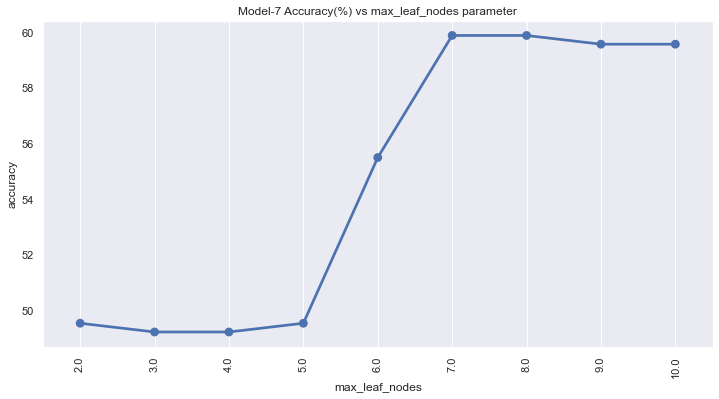

In [52]:
c_parameter_name = 'max_leaf_nodes'
c_parameter_values = [2,3,4,5,6,7,8,9,10]
c_best_parameter = 0
c_best_accuracy = 0
c_worst_parameter = 0
c_worst_accuracy = 100
df = pd.DataFrame(columns=[c_parameter_name, 'accuracy'])
for input_parameter in c_parameter_values:
    model = tree.DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=input_parameter, random_state=35)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
        
    acc_score = accuracy_score(y_test,y_pred)*100
    
    df = df.append({c_parameter_name : input_parameter , 'accuracy' : acc_score}, ignore_index=True)
    
    if acc_score > c_best_accuracy:
        c_best_accuracy = acc_score
        c_best_parameter = input_parameter
        c_best_model = model
        
    if acc_score < c_worst_accuracy:
        c_worst_accuracy = acc_score
        c_worst_parameter = input_parameter
        c_worst_model = model
    
print(df)
print("")
plt.figure(figsize=(12,6))
sns.pointplot(x=c_parameter_name, y="accuracy", data=df)
title = 'Model-7 Accuracy(%) vs ' + c_parameter_name + ' parameter'
plt.title(title)
plt.xticks(rotation= 90)
plt.grid()

   min_impurity_decrease   accuracy
0                 0.0005  54.858934
1                 0.0010  55.799373
2                 0.0020  56.426332
3                 0.0050  59.561129
4                 0.0100  59.874608
5                 0.0200  55.485893
6                 0.0500  49.529781



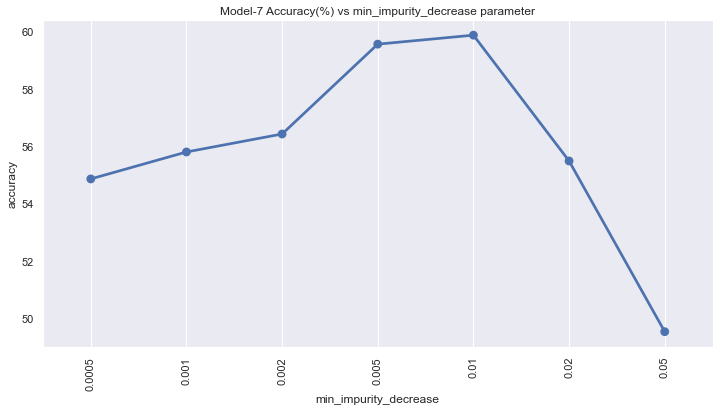

In [53]:
c_parameter_name = 'min_impurity_decrease'
c_parameter_values = [0.0005,0.001,0.002,0.005,0.01,0.02,0.05]
c_best_parameter = 0
c_best_accuracy = 0
c_worst_parameter = 0
c_worst_accuracy = 100
df = pd.DataFrame(columns=[c_parameter_name, 'accuracy'])
for input_parameter in c_parameter_values:
    model = tree.DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=input_parameter, random_state=35)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
        
    acc_score = accuracy_score(y_test,y_pred)*100
    
    df = df.append({c_parameter_name : input_parameter , 'accuracy' : acc_score}, ignore_index=True)
    
    if acc_score > c_best_accuracy:
        c_best_accuracy = acc_score
        c_best_parameter = input_parameter
        c_best_model = model
        
    if acc_score < c_worst_accuracy:
        c_worst_accuracy = acc_score
        c_worst_parameter = input_parameter
        c_worst_model = model
    
print(df)
print("")
plt.figure(figsize=(12,6))
sns.pointplot(x=c_parameter_name, y="accuracy", data=df)
title = 'Model-7 Accuracy(%) vs ' + c_parameter_name + ' parameter'
plt.title(title)
plt.xticks(rotation= 90)
plt.grid()

In [54]:
#let's try our pruned model
pruned_model = tree.DecisionTreeClassifier(criterion='entropy', 
                                           splitter='random', 
                                           max_depth=4, 
                                           min_samples_split=80, 
                                           min_samples_leaf=50, 
                                           max_leaf_nodes=7, 
                                           min_impurity_decrease=0.02, 
                                           random_state=35)

pruned_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=7,
                       min_impurity_decrease=0.02, min_samples_leaf=50,
                       min_samples_split=80, random_state=35,
                       splitter='random')

In [55]:
#gathering the predictions
prediction = pruned_model.predict(x_test)

con_mat = confusion_matrix(y_test, prediction)
print(con_mat)
print('Accuracy Score :', accuracy_score(y_test, prediction) )

[[ 0 88  5]
 [ 0 90 66]
 [ 0  2 68]]
Accuracy Score : 0.4952978056426332


In [56]:
#classification matrix
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        93
         1.0       0.50      0.58      0.54       156
         2.0       0.49      0.97      0.65        70

    accuracy                           0.50       319
   macro avg       0.33      0.52      0.40       319
weighted avg       0.35      0.50      0.40       319



In [57]:
# Visualize data 

import pydotplus
#from sklearn import tree (already imported)
import collections

dot_data = tree.export_graphviz(pruned_model,
                                feature_names=feature_cols,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('dec_tree.png')

True

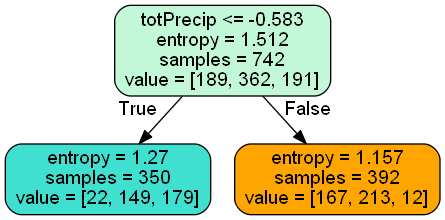

In [58]:
#display the png here
from IPython.display import Image

Image(filename='dec_tree.png') 

In [59]:
#let's try our pruned model with Random Forest
pruned_model = RandomForestClassifier(max_depth=5,
                                      min_samples_split=80,
                                      min_samples_leaf=50,
                                      max_leaf_nodes=7, 
                                      min_impurity_decrease=0.01,
                                      random_state=35)

pruned_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=7,
                       min_impurity_decrease=0.01, min_samples_leaf=50,
                       min_samples_split=80, random_state=35)

In [60]:
#gathering the predictions
prediction = pruned_model.predict(x_test)

con_mat = confusion_matrix(y_test, prediction)
print(con_mat)
print('Accuracy Score :', accuracy_score(y_test, prediction) )

[[  0  92   1]
 [  0 125  31]
 [  0  21  49]]
Accuracy Score : 0.5454545454545454


In [61]:
#classification matrix
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        93
         1.0       0.53      0.80      0.63       156
         2.0       0.60      0.70      0.65        70

    accuracy                           0.55       319
   macro avg       0.38      0.50      0.43       319
weighted avg       0.39      0.55      0.45       319



## KNN

In [62]:
# test values for k to see what looks best

scores = []
print(f'Features: {feature_cols} \nTarget: {prediction_col}')

for k in range(2, 20):
    model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    model.fit(x_train, y_train)
    scores.append(model.score(x_test, y_test))

Features: ['avgTmax', 'avgTmin', 'totPrecip'] 
Target: Count


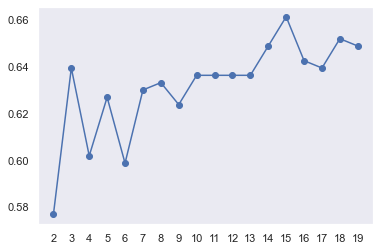

In [63]:
# display the resutls
plt.plot(range(2, 20), scores)
plt.scatter(range(2, 20), scores)
plt.grid()
_ =plt.xticks(range(2, 20))

In [64]:
# define and fit our model
model = KNeighborsClassifier(n_neighbors=15, n_jobs=-1)
model.fit(x_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=15)

In [65]:
# gather the predictations that our model made for our test set
predictions = model.predict(x_test)

con_mat = confusion_matrix(y_test, predictions)
print(con_mat)
print('Accuracy Score :', accuracy_score(y_test, predictions) )

[[ 53  38   2]
 [ 29 101  26]
 [  0  13  57]]
Accuracy Score : 0.6614420062695925


In [66]:
#classification matrix
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.65      0.57      0.61        93
         1.0       0.66      0.65      0.66       156
         2.0       0.67      0.81      0.74        70

    accuracy                           0.66       319
   macro avg       0.66      0.68      0.67       319
weighted avg       0.66      0.66      0.66       319



## Neural Network

The grid seach method utilized below is based off of the code from: 
https://medium.com/@panjeh/scikit-learn-hyperparameter-optimization-for-mlpclassifier-4d670413042b

In [67]:
# Create a parameter list to optimize off of

parameter_space = {
    'max_iter':[100, 500, 1000],
    'hidden_layer_sizes': [(5,), (10,), (20,)],
    'activation': ['relu', 'tanh'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.01, 0.05],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}

In [68]:
# create the model and the grid search
model = MLPClassifier() 

clf = GridSearchCV(model, parameter_space, n_jobs=-1, cv=5)
clf.fit(x, y)

GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.01, 0.05],
                         'hidden_layer_sizes': [(5,), (10,), (20,)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'max_iter': [100, 500, 1000],
                         'solver': ['sgd', 'adam']})

In [69]:
# Best parameter set
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (20,), 'learning_rate': 'invscaling', 'max_iter': 1000, 'solver': 'adam'}


In [70]:
#create validation set from the training set
x_trainV, x_val, y_trainV, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=35)

In [71]:
model = MLPClassifier(hidden_layer_sizes=(20,), 
                      activation='tanh', 
                      alpha=0.05, 
                      learning_rate='invscaling', 
                      solver='adam', 
                      max_iter=1000)


In [72]:
model.fit(x_trainV, y_trainV) 

train = model.loss_curve_

In [73]:
model.fit(x_val, y_val) 
val = model.loss_curve_

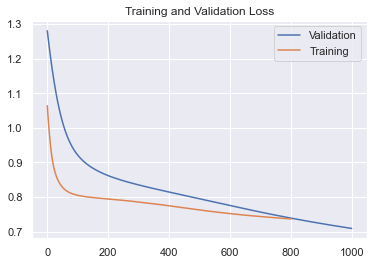

In [74]:
# training and validation loss curve
fig, ax = plt.subplots()
ax.set_title('Training and Validation Loss')
ax.plot(val, label='Validation')
ax.plot(train, label='Training')
ax.legend()

In [75]:
#fit the model to the training data
model.fit(x_train, y_train) 

MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=(20,),
              learning_rate='invscaling', max_iter=1000)

In [76]:
# make predictions
predictions = model.predict(x_test)  

In [77]:
y_true, y_pred = y_test , model.predict(x_test)
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

         0.0       0.70      0.57      0.63        93
         1.0       0.68      0.71      0.69       156
         2.0       0.69      0.80      0.74        70

    accuracy                           0.69       319
   macro avg       0.69      0.69      0.69       319
weighted avg       0.69      0.69      0.68       319



In [78]:
con_mat = confusion_matrix(y_test, predictions)
print(con_mat)
print('Accuracy Score :', accuracy_score(y_test, predictions) )

[[ 53  38   2]
 [ 23 110  23]
 [  0  14  56]]
Accuracy Score : 0.6865203761755486
